In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
rcParams['axes.unicode_minus'] = False   # 正常显示负号

In [11]:
#定义一些基本变量
L = 1
m = 1
g = 9.8
theta0 = np.pi/2
omega0 = 0
t =np.linspace(0,10,1000)

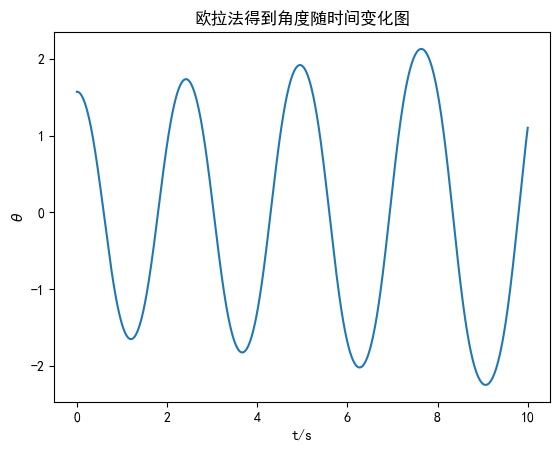

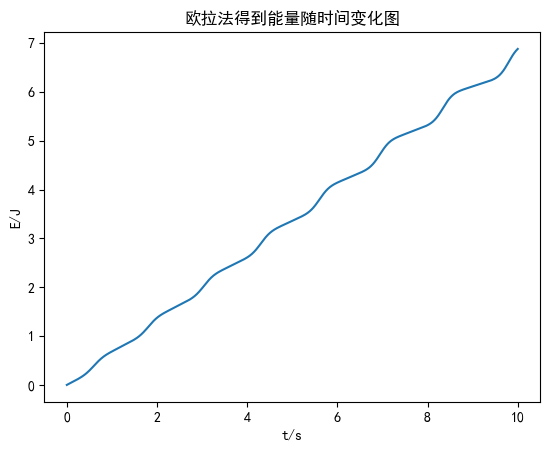

In [12]:
#欧拉法
def EulerMethod(theta0,omega0,t):
    '''已知初始条件和待求t的范围'''
    n = len(t)
    dt = np.diff(t)

    theta = np.zeros_like(t)
    omega = np.zeros_like(t)

    theta[0] = theta0
    omega[0] = omega0
    
    for i in range(1,n):
        h = dt[i-1]
        
        omega[i] = omega[i-1]-h*(g/L)*np.sin(theta[i-1])
        
        theta[i] = theta[i-1]+h*omega[i-1]
    
    E = -m*g*L*np.cos(theta)+0.5*m*(L*omega)**2
    
    return theta,E

theta_EulerMethod,E_EulerMethod = EulerMethod(theta0,omega0,t)

plt.figure()
plt.title("欧拉法得到角度随时间变化图")
plt.xlabel(r"t/s")
plt.ylabel(r"$\theta$")
plt.plot(t,theta_EulerMethod)
plt.show()

plt.figure()
plt.title("欧拉法得到能量随时间变化图")
plt.xlabel(r"t/s")
plt.ylabel(r"E/J")
plt.plot(t,E_EulerMethod)


plt.show()


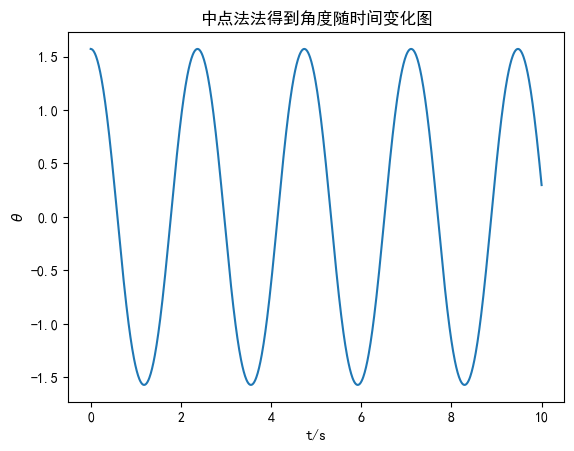

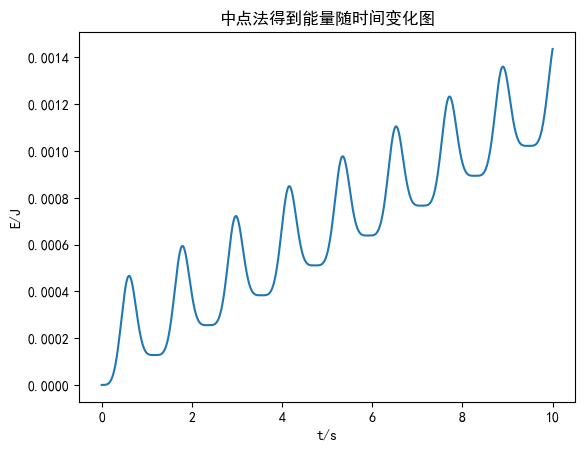

In [13]:
# 中点法
def MidpointMethod(theta0,omega0,t):
    n = len(t)
    dt = np.diff(t)

    theta = np.zeros_like(t)
    omega = np.zeros_like(t)

    theta[0] =theta0
    omega[0] = omega0
    
    Delta_theta = np.zeros_like(t)
    Delta_omega = np.zeros_like(t)
    
    for i in range(1,n):
        h = dt[i-1]
        Delta_omega[i-1] = h*(-g/L *np.sin(theta[i-1]))
        Delta_theta[i-1] = h*omega[i-1]
        
        
        omega[i] = omega[i-1]+h*(-g/L *np.sin(theta[i-1]+0.5*Delta_theta[i-1]))
        theta[i] = theta[i-1]+h*(omega[i-1]+0.5*Delta_omega[i-1])
        
    E = -m*g*L*np.cos(theta)+0.5*m*(L*omega)**2
    return theta,E

theta_predictpointMethod,E_MidpointMethod = MidpointMethod(theta0,omega0,t)

plt.figure()
plt.title("中点法法得到角度随时间变化图")
plt.xlabel(r"t/s")
plt.ylabel(r"$\theta$")
plt.plot(t,theta_predictpointMethod)
plt.show()

plt.figure()
plt.title("中点法得到能量随时间变化图")
plt.xlabel(r"t/s")
plt.ylabel(r"E/J")
plt.plot(t,E_MidpointMethod)
plt.show()

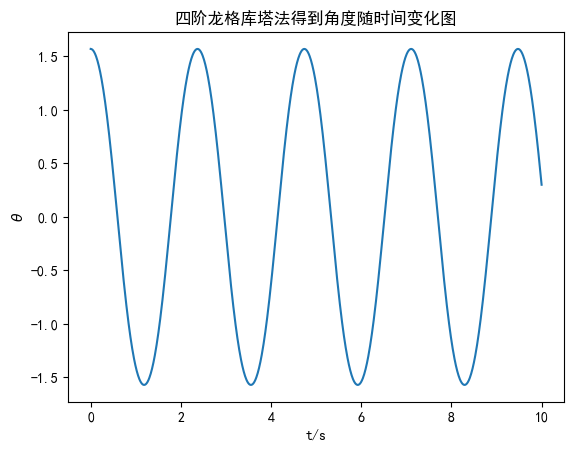

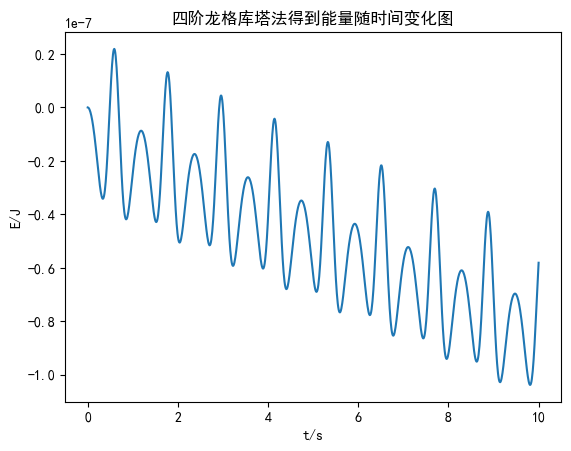

In [14]:
#四阶龙格-库塔方法
def RK4(theta0,omega0,t):
    n = len(t)
    dt = np.diff(t)

    theta = np.zeros_like(t)
    omega = np.zeros_like(t)

    theta[0] = theta0
    omega[0] = omega0
    
    for i in range(1,n):
        h = dt[i-1]
        
        # 对theta和omega的微分方程
        K1_theta = omega[i-1]
        K1_omega = -g / L * np.sin(theta[i-1])
        
        K2_theta = omega[i-1] + 0.5 * h * K1_omega
        K2_omega = -g / L * np.sin(theta[i-1] + 0.5 * h * K1_theta)
        
        K3_theta = omega[i-1] + 0.5 * h * K2_omega
        K3_omega = -g / L * np.sin(theta[i-1] + 0.5 * h * K2_theta)
        
        K4_theta = omega[i-1] + h * K3_omega
        K4_omega = -g / L * np.sin(theta[i-1] + h * K3_theta)
        
        # 更新theta和omega
        theta[i] = theta[i-1] + h/6 * (K1_theta + 2*K2_theta + 2*K3_theta + K4_theta)
        omega[i] = omega[i-1] + h/6 * (K1_omega + 2*K2_omega + 2*K3_omega + K4_omega)
    
        
    E = -m*g**L*np.cos(theta)+0.5*m*(L*omega)**2
    return theta,E

theta_RK4,E_RK4 = RK4(theta0,omega0,t)

plt.figure()
plt.title("四阶龙格库塔法得到角度随时间变化图")
plt.xlabel(r"t/s")
plt.ylabel(r"$\theta$")
plt.plot(t,theta_RK4)
plt.show()

plt.figure()
plt.title("四阶龙格库塔法得到能量随时间变化图")
plt.xlabel(r"t/s")
plt.ylabel(r"E/J")
plt.plot(t,E_RK4)
plt.show()

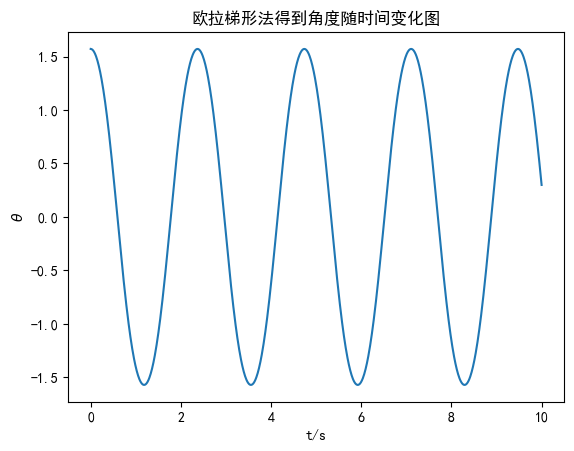

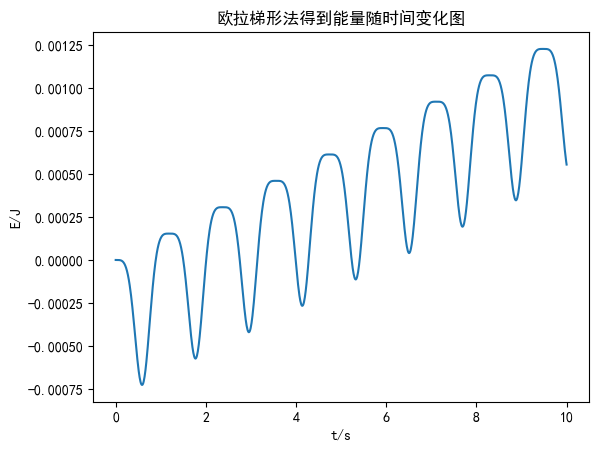

In [15]:
#欧拉梯形法
def EulerTrapezoidalMethod(theta0,omega0,t):
    epsilon = 0.0001 #被允许的最大误差

    n = len(t)
    dt = np.diff(t)

    theta = np.zeros_like(t)
    omega = np.zeros_like(t)

    theta[0] = theta0
    omega[0] = omega0
    
    
    for i in range(1,n):
        h = dt[i-1]

        # 先用欧拉法预估
        omega_Euler = omega[i-1]+h*(-g/L*np.sin(theta[i-1]))
        theta_Euler = theta[i-1]+h*omega[i-1]
        
        #再修正
        omega_correct = np.zeros(2)
        theta_correct = np.zeros(2)
        
        omega_correct[0] = omega[i-1]+0.5*h*((-g/L*np.sin(theta[i-1]))+(-g/L*np.sin(theta_Euler)))
        theta_correct[0] = theta[i-1]+0.5*h*(omega_Euler+omega[i-1])
        
        omega_correct[1] = omega[i-1]+0.5*h*((-g/L*np.sin(theta_correct[0]))+(-g/L*np.sin(theta[i-1])))
        theta_correct[1] = theta[i-1]+0.5*h*(omega[i-1]+omega_correct[0])
        
        #迭代修正
        while np.abs(omega_correct[0]-omega_correct[1])>epsilon or np.abs(theta_correct[0]-theta_correct[1])> epsilon:
            print(np.abs(omega_correct[0]-omega_correct[1]))
            
            omega_correct[0] = omega_correct[1]
            theta_correct[0] = theta_correct[1]
            
            omega_correct[1] =  omega[i-1]+0.5*h*((-g/L*np.sin(theta_correct[0]))+(-g/L*np.sin(theta[i-1])))
            theta_correct[1] = theta[i-1]+0.5*h*(omega[i-1]+omega_correct[0])
        else:
            theta[i] = theta_correct[0]
            omega[i] = omega_correct[0]
            
                        
    
    E = -m*g*L*np.cos(theta)+0.5*m*((L*omega)**2)
    
    return theta,E
        
theta_EulerTrapezoidalMethod,E_EulerTrapezoidalMethod = EulerTrapezoidalMethod(theta0,omega0,t)

plt.figure()
plt.title("欧拉梯形法得到角度随时间变化图")
plt.xlabel(r"t/s")
plt.ylabel(r"$\theta$")
plt.plot(t,theta_EulerTrapezoidalMethod)
plt.show()

plt.figure()
plt.title("欧拉梯形法得到能量随时间变化图")
plt.xlabel(r"t/s")
plt.ylabel(r"E/J")
plt.plot(t,E_EulerTrapezoidalMethod)
plt.show()

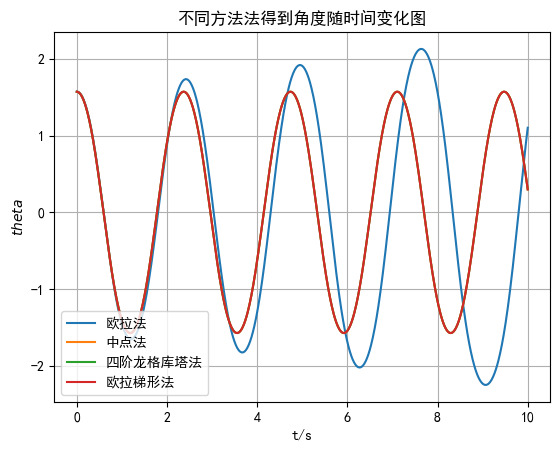

In [16]:

plt.figure()
plt.title("不同方法法得到角度随时间变化图")
plt.xlabel(r"t/s")
plt.ylabel(r"$theta$")

plt.plot(t,theta_EulerMethod,label='欧拉法')
plt.plot(t,theta_predictpointMethod,label='中点法')
plt.plot(t,theta_RK4,label='四阶龙格库塔法')
plt.plot(t,theta_EulerTrapezoidalMethod,label='欧拉梯形法')

plt.grid()
plt.legend()
plt.show()

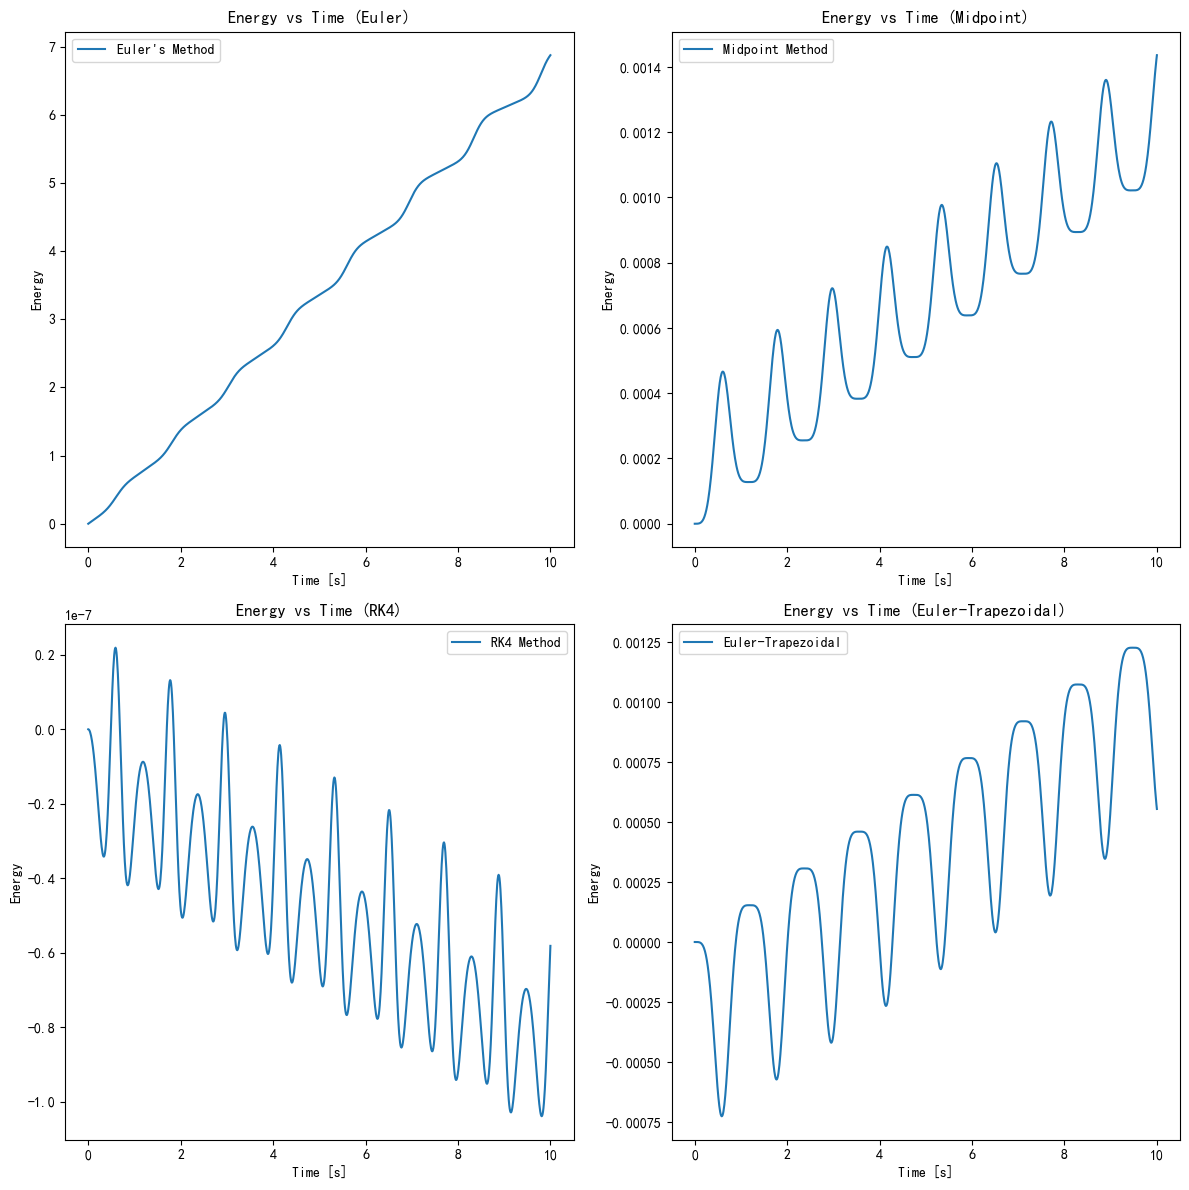

In [17]:
# 对比不同方法结果
plt.figure(figsize=(12,12))


plt.subplot(2, 2, 1)

plt.plot(t, E_EulerMethod, label="Euler's Method")

plt.xlabel('Time [s]')

plt.ylabel('Energy')

plt.title('Energy vs Time (Euler)')

plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t, E_MidpointMethod, label="Midpoint Method")
plt.xlabel('Time [s]')
plt.ylabel('Energy')
plt.title('Energy vs Time (Midpoint)')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(t, E_RK4, label="RK4 Method")
plt.xlabel('Time [s]')
plt.ylabel('Energy')
plt.title('Energy vs Time (RK4)')
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(t, E_EulerTrapezoidalMethod, label="Euler-Trapezoidal")
plt.xlabel('Time [s]')
plt.ylabel('Energy')
plt.title('Energy vs Time (Euler-Trapezoidal)')
plt.legend()
plt.tight_layout()
plt.show()

氢原子最低的三个本征态：


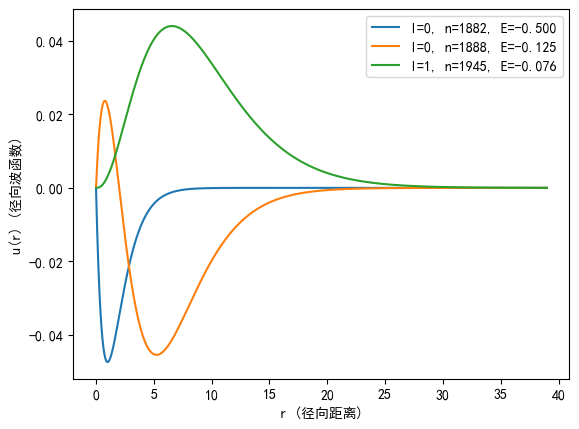

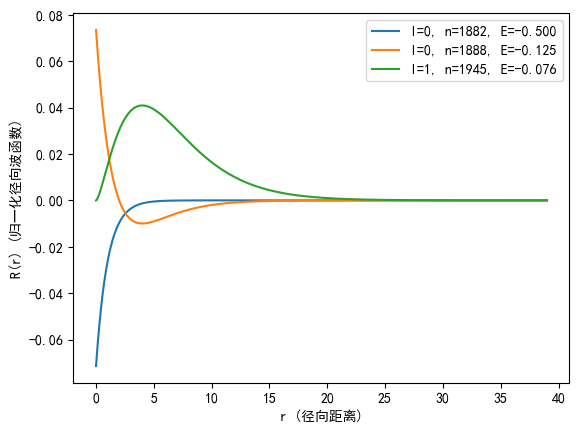

锂原子最低的三个本征态：


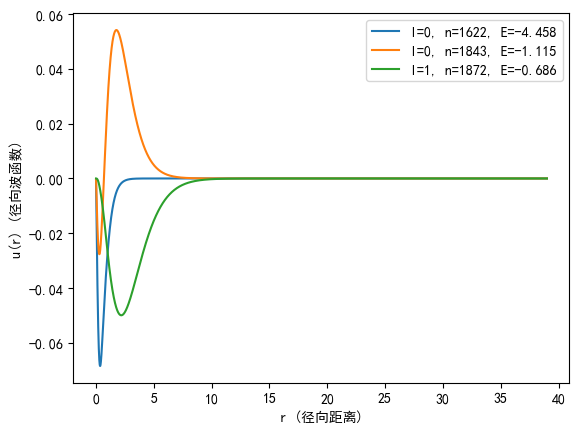

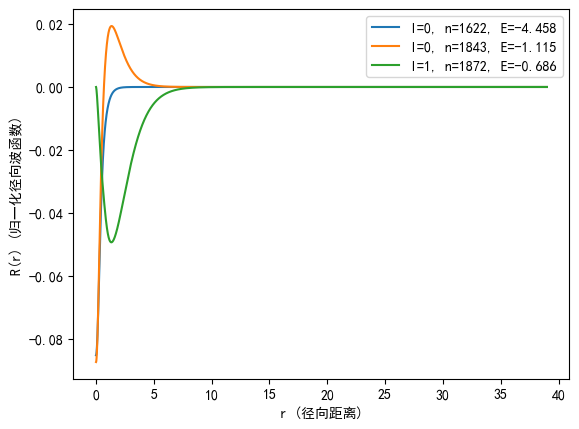

In [18]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt

# 定义氢原子的有效势函数
def hydrogen_potential(r):
    return -1 / r

# 定义锂原子的有效势函数
def lithium_potential(r):
    Z_ion = 3  # 离子核电荷数
    r_core = 0.4  # 局域化参数
    coefficients = [-14.0093922, 9.5099073, -1.7532723, 0.0834586]
    # 第一个项：屏蔽库仑势
    shielded_coulomb = -Z_ion / r * erf(r / (np.sqrt(2) * r_core))
    # 第二个项：高斯修正项
    gaussian_correction = np.exp(-0.5 * (r / r_core)**2) * sum(
        c * (r / r_core)**(2 * i) for i, c in enumerate(coefficients)
    )
    return shielded_coulomb + gaussian_correction

# 使用有限差分法求解薛定谔方程的本征值和本征态
def finite_difference(potential_function):
    """
    使用有限差分方法求解径向薛定谔方程并绘制本征态。
    """
    r_min = 1  # 初始半径（防止 r=0 的奇点问题）
    num_points = 2000  # 网格点数量
    t_max = np.log(40)  # 变换后的时间范围
    dt = t_max / num_points  # 时间步长
    t_values = np.linspace(dt, t_max, num_points)

    # 通过变换生成径向网格点
    r_values = r_min * (np.exp(t_values) - 1)
    eigenvalues = []  # 用于存储本征值
    eigenvectors = []  # 用于存储本征态

    for angular_momentum in [0, 1, 2]:  # 角动量量子数 l = 0, 1, 2
        # 构造哈密顿量矩阵
        hamiltonian = np.zeros((num_points, num_points))
        potential_values = potential_function(r_values)

        for i in range(num_points):
            scaling_factor = (1 / (r_min * np.exp(t_values[i])))**2 / 2
            hamiltonian[i, i] = (
                potential_values[i]
                + angular_momentum * (angular_momentum + 1) / r_values[i]**2
                + 2 / dt**2 * scaling_factor
            )
            if i < num_points - 1:
                hamiltonian[i, i + 1] = -1 / dt**2 * scaling_factor + 1 / (2 * dt) * scaling_factor
            if i > 0:
                hamiltonian[i, i - 1] = -1 / dt**2 * scaling_factor - 1 / (2 * dt) * scaling_factor

        # 求解本征值和本征向量
        eigvals, eigvecs = np.linalg.eig(hamiltonian)
        sorted_indices = np.argsort(eigvals)  # 对本征值进行排序
        for idx in sorted_indices[:3]:  # 取前 3 个最小本征值
            eigenvalues.append([eigvals[idx], angular_momentum, angular_momentum + idx + 1])
            eigenvectors.append(eigvecs[:, idx])

    eigenvalues = np.array(eigenvalues)
    # 获取 3 个能量最低的本征值对应的索引
    lowest_indices = np.argsort(eigenvalues[:, 0])[:3]

    # 绘制本征态
    for idx in lowest_indices:
        l, n, energy = eigenvalues[idx, 1], eigenvalues[idx, 2], eigenvalues[idx, 0]
        normalized_eigenvector = eigenvectors[idx] / np.sqrt(np.sum(eigenvectors[idx]**2))
        plt.plot(r_values, normalized_eigenvector, label=f"l={int(l)}, n={int(n)}, E={energy:.3f}")

    plt.xlabel("r (径向距离)")
    plt.ylabel("u(r) (径向波函数)")
    plt.legend()
    plt.show()

    # 绘制归一化的 R(r) = u(r) / r
    for idx in lowest_indices:
        l, n, energy = eigenvalues[idx, 1], eigenvalues[idx, 2], eigenvalues[idx, 0]
        normalized_radial = eigenvectors[idx] / r_values / np.sqrt(np.sum((eigenvectors[idx] / r_values)**2))
        plt.plot(r_values, normalized_radial, label=f"l={int(l)}, n={int(n)}, E={energy:.3f}")

    plt.xlabel("r (径向距离)")
    plt.ylabel("R(r) (归一化径向波函数)")
    plt.legend()
    plt.show()


if __name__ == "__main__":
    print("氢原子最低的三个本征态：")
    finite_difference(hydrogen_potential)
    print("锂原子最低的三个本征态：")
    finite_difference(lithium_potential)
